In [1]:
#install and download needed packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
import scipy
from sklearn.ensemble import RandomForestRegressor, VotingRegressor, StackingRegressor,BaggingRegressor,GradientBoostingRegressor
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict,KFold
from sklearn.metrics import mean_squared_error,accuracy_score, mean_absolute_error, mean_absolute_percentage_error
from sklearn.decomposition import PCA
import statsmodels.api as sm
warnings.filterwarnings('ignore')

In [2]:
data= pd.read_csv('PYPL.csv')

In [3]:
data.shape 

(2160, 7)

In [4]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-07-27,36.779999,37.380001,36.220001,36.389999,36.389999,16179900
1,2015-07-28,37.189999,38.000000,36.830002,37.599998,37.599998,18986000
2,2015-07-29,38.029999,38.099998,37.619999,37.950001,37.950001,11788400
3,2015-07-30,38.040001,39.009998,37.715000,38.450001,38.450001,13845100
4,2015-07-31,39.139999,39.200001,38.220001,38.700001,38.700001,12480600


In [5]:
data.index 

RangeIndex(start=0, stop=2160, step=1)

In [6]:
data=data.rename(columns={'Date':'date','Open':'open','High':'high','Low':'low','Close':'close','Volume':'volume'})

In [7]:
data=data.drop(columns=['Adj Close'],axis=1)

In [8]:
data['date']=pd.to_datetime(data['date'])

In [9]:
data.set_index('date', inplace=True)

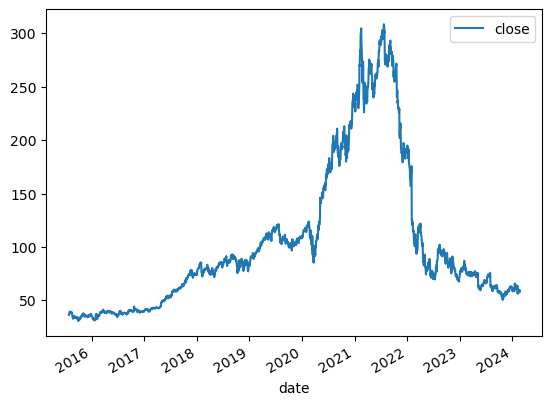

In [10]:
data.plot.line(y='close', use_index=True)
plt.savefig('PYPL.png');

In [11]:
data.describe()

,open,high,low,close,volume
count,2160.000000,2160.000000,2160.000000,2160.000000,2.160000e+03
mean,103.314849,104.704577,101.730392,103.254023,1.048589e+07
std,68.944274,69.785398,67.776829,68.812386,7.031262e+06
min,30.820000,31.280001,30.000000,30.629999,1.680000e+06
25%,57.844999,58.647501,57.138750,57.967500,6.248500e+06
50%,81.720001,83.220001,80.222500,81.575001,8.581500e+06
75%,113.009998,114.810001,111.327497,112.957500,1.267688e+07
max,309.660004,310.160004,305.230011,308.529999,1.362640e+08


In [11]:
data['Tomorrow']=data['close'].shift(-1)

In [12]:
data['previousday']=data['close'].shift(1)

In [13]:
data.head() 

,open,high,low,close,volume,Tomorrow,previousday
date,,,,,,,
2015-07-27,36.779999,37.380001,36.220001,36.389999,16179900,37.599998,NaN
2015-07-28,37.189999,38.000000,36.830002,37.599998,18986000,37.950001,36.389999
2015-07-29,38.029999,38.099998,37.619999,37.950001,11788400,38.450001,37.599998
2015-07-30,38.040001,39.009998,37.715000,38.450001,13845100,38.700001,37.950001
2015-07-31,39.139999,39.200001,38.220001,38.700001,12480600,39.389999,38.450001


In [14]:
train = data.iloc[:-200]
test = data.iloc[-200:]

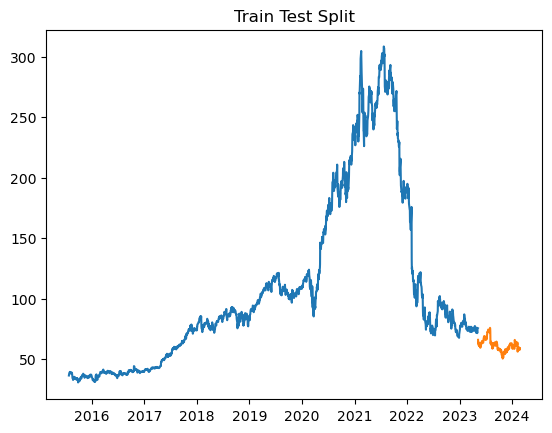

In [15]:
import matplotlib.pyplot as plt 
plt.plot(train['close'], label='train')
plt.plot(test['close'], label='test')
plt.title('Train Test Split');

In [16]:
# Utility function
def evaluate_model(model, x, y):
    """
    Utility function to print the model performance, (MAE and MAPE)
    model: Fitted model
    x:  features dataset
    y:  target values
    """
    predicted = model.predict(x) #get predictions
    mae = mean_absolute_error(y_true=y, y_pred=predicted)
    abs_errors= np.abs(np.array(predicted) - np.array(y))
    min_abs_errors= np.min(abs_errors)
    max_abs_errors= np.max(abs_errors)
    med_abs_errors= np.median(abs_errors)
    mape = mean_absolute_percentage_error(y, predicted)

    print('MAE: {:.2f}'.format(mae))
    print('MAPE: {:.2f}'.format(mape))
    print('minae: {:.2f}'.format(min_abs_errors))
    print('maxae: {:.2f}'.format(max_abs_errors))
    print('medae: {:.2f}'.format(med_abs_errors))
    print()

In [17]:
#predictors_1 = ["close", "volume", "open", "high", "low"]
predictors_2 = ["volume", "open", "high", "low"]

In [18]:
# creating a dictionary of Regressors to be experimented on.
models_dict = {
          'RF Regressor':RandomForestRegressor(random_state=0),
          'xgboost': XGBRegressor(),'Gradient Boost': GradientBoostingRegressor(random_state=0),
    'Catboostregressor':CatBoostRegressor(iterations=100, early_stopping_rounds=50)
         }

#looping through all the regressors, fitting and evaluating them on  test data respectively
for key, model in models_dict.items():
    model.fit(train[predictors_2], train['close'])
    print(f'Performance of "{key}" on Validation and Test set:')
    print('=='*28)
    print ( 'Test set:')
    print("**"*8)
    evaluate_model(model,test[predictors_2], test['close'])





Performance of "RF Regressor" on Validation and Test set:
Test set:
****************
MAE: 0.55
MAPE: 0.01
minae: 0.01
maxae: 3.19
medae: 0.41

Performance of "xgboost" on Validation and Test set:
Test set:
****************
MAE: 0.75
MAPE: 0.01
minae: 0.00
maxae: 5.53
medae: 0.51

Performance of "Gradient Boost" on Validation and Test set:
Test set:
****************
MAE: 0.62
MAPE: 0.01
minae: 0.00
maxae: 2.87
medae: 0.47

Learning rate set to 0.296044
0:	learn: 51.2683882	total: 141ms	remaining: 14s
1:	learn: 37.0245488	total: 144ms	remaining: 7.04s
2:	learn: 26.8770681	total: 146ms	remaining: 4.72s
3:	learn: 19.6485702	total: 148ms	remaining: 3.56s
4:	learn: 14.4923742	total: 151ms	remaining: 2.87s
5:	learn: 10.8595006	total: 154ms	remaining: 2.41s
6:	learn: 8.2961990	total: 156ms	remaining: 2.08s
7:	learn: 6.5369339	total: 159ms	remaining: 1.83s
8:	learn: 5.3862187	total: 161ms	remaining: 1.63s
9:	learn: 4.6534656	total: 164ms	remaining: 1.47s
10:	learn: 4.1938977	total: 167ms	remain

#### Retrain the best Model(Extreme Gradient Boosting)

In [19]:
model= GradientBoostingRegressor()
model.fit(train[predictors_2], train['close'])
pred= model.predict(test[predictors_2])

In [20]:

pred= pd.Series(pred, index=test.index)
combined_2= pd.concat([test['close'], pred],axis=1)

In [21]:
#combined_1.plot();
combined_2

,close,0
date,,
2023-05-09,65.904999,68.187664
2023-05-10,63.380001,64.196363
2023-05-11,64.180000,63.828491
2023-05-12,61.689999,62.896494
2023-05-15,62.250000,61.941350
...,...,...
2024-02-16,59.139999,59.719997
2024-02-20,58.630001,58.552831
2024-02-21,57.480000,58.346116


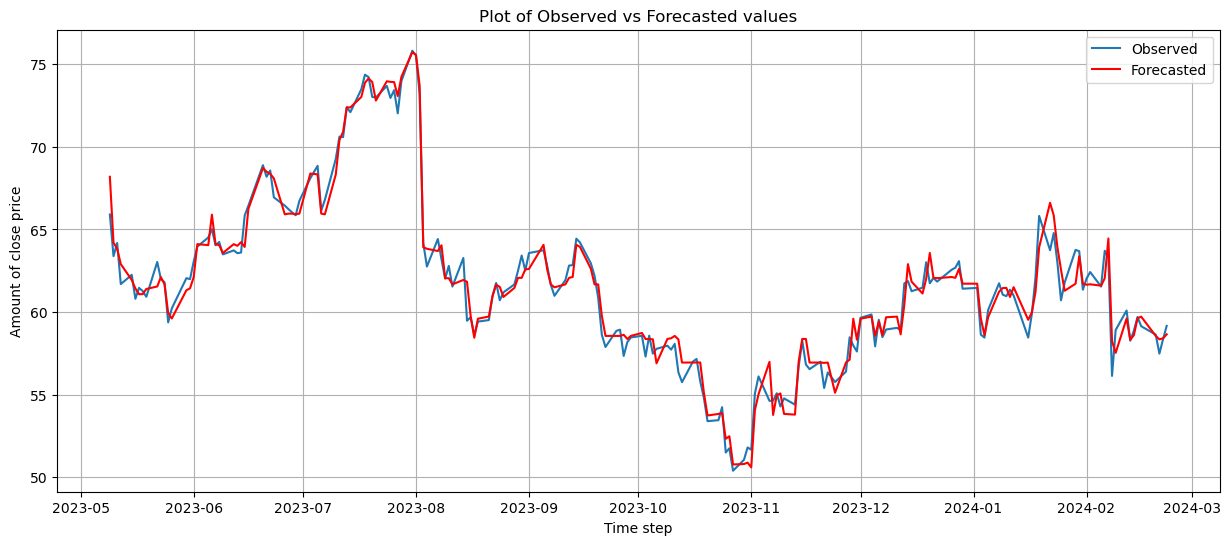

In [22]:
# Plot the test predictions and true values
plt.figure(figsize=(15,6))
plt.plot(combined_2['close'], label='Observed')
plt.plot(combined_2[0], color='r', label='Forecasted')
plt.title('Plot of Observed vs Forecasted values')
plt.ylabel('Amount of close price')
plt.xlabel('Time step')
plt.legend()
plt.grid()
plt.savefig('forcast.png')
plt.show()

In [23]:
#add additional predictors to the model
#calculate the mean close price in certain days and  find the ratio between today's closing price and that of the periods
horizons = [2,5,60,250,1000]
new_predictors = []

for horizon in horizons:
    rolling_averages = data.rolling(horizon).mean()
    
    ratio_column = f"Close_Ratio_{horizon}"
    data[ratio_column] = data["close"] / rolling_averages["close"]
    
    trend_column = f"Trend_{horizon}"
    data[trend_column] = data.shift(1).rolling(horizon).sum()["close"]
    
    
    
    new_predictors+= [ratio_column, trend_column]

In [24]:
data['mom'] = data['close'].pct_change(12) # 12 month change

In [25]:
#Create the RSI indicator
#data['rsi' + str(n)] = talib.RSI(data['close'].values, timeperiod=horizon)
def computeRSI (data, time_window):
    diff = data.diff(1).dropna()        # diff in one field(one day)

    #this preservers dimensions off diff values
    up_chg = 0 * diff
    down_chg = 0 * diff
    
    # up change is equal to the positive difference, otherwise equal to zero
    up_chg[diff > 0] = diff[ diff>0 ]
    
    # down change is equal to negative deifference, otherwise equal to zero
    down_chg[diff < 0] = diff[ diff < 0 ]
    
    
    # we set com=time_window-1 so we get decay alpha=1/time_window
    up_chg_avg   = up_chg.ewm(com=time_window-1 , min_periods=time_window).mean()
    down_chg_avg = down_chg.ewm(com=time_window-1 , min_periods=time_window).mean()
    
    rs = abs(up_chg_avg/down_chg_avg)
    rsi = 100 - 100/(1+rs)
    return rsi

In [26]:
data['RSI']= computeRSI(data['close'], 14)

In [27]:
data.head()

,open,high,low,close,volume,Tomorrow,previousday,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000,mom,RSI
date,,,,,,,,,,,,,,,,,,,
2015-07-27,36.779999,37.380001,36.220001,36.389999,16179900,37.599998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-07-28,37.189999,38.000000,36.830002,37.599998,18986000,37.950001,36.389999,1.016354,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-07-29,38.029999,38.099998,37.619999,37.950001,11788400,38.450001,37.599998,1.004633,73.989997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-07-30,38.040001,39.009998,37.715000,38.450001,13845100,38.700001,37.950001,1.006545,75.549999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-07-31,39.139999,39.200001,38.220001,38.700001,12480600,39.389999,38.450001,1.003240,76.400002,1.023322,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
data.shape 

(2160, 19)

In [29]:
new_data=data[new_predictors]
new_data['close']=data['close']
new_data['MOM']=data['mom']
new_data.head()

,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000,close,MOM
date,,,,,,,,,,,,
2015-07-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36.389999,NaN
2015-07-28,1.016354,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.599998,NaN
2015-07-29,1.004633,73.989997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.950001,NaN
2015-07-30,1.006545,75.549999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38.450001,NaN
2015-07-31,1.003240,76.400002,1.023322,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38.700001,NaN


In [30]:
new_data['SMA_3'] = new_data.iloc[:,10].rolling(window=3).mean()
new_data['SMA_4'] = new_data.iloc[:,10].rolling(window=4).mean()

In [31]:
new_data['CMA_4'] = new_data['close'].expanding(min_periods=4).mean()

In [32]:
new_data['EMA'] = new_data.iloc[:,10].ewm(span=40,adjust=False).mean()

In [33]:
new_data=new_data.dropna()
new_data.shape 

(1160, 16)

In [34]:
new_data.head()

,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000,close,MOM,SMA_3,SMA_4,CMA_4,EMA
date,,,,,,,,,,,,,,,,
2019-07-17,0.996227,240.610001,0.989770,601.020005,1.047898,6790.760019,1.240946,23904.780051,1.901983,62383.950045,118.809998,0.038005,119.806666,119.885000,62.440320,115.298481
2019-07-18,1.004441,238.519997,0.999900,600.190004,1.055235,6802.760019,1.250320,23935.370048,1.916429,62466.370044,119.870003,0.042076,119.463333,119.822500,62.497635,115.521482
2019-07-19,0.994801,238.680001,0.992022,599.410005,1.042574,6815.730020,1.235780,23967.860054,1.894161,62548.640049,118.629997,0.021176,119.103333,119.254999,62.553599,115.673117
2019-07-22,1.000253,238.500000,0.996206,597.919999,1.041809,6827.140016,1.234889,23999.020050,1.892694,62629.320045,118.690002,0.008583,119.063334,119.000000,62.609512,115.820282
2019-07-23,1.006404,237.319999,1.008185,595.709999,1.053750,6835.610017,1.249310,24028.470054,1.914603,62709.560046,120.220001,0.026118,119.180000,119.352501,62.666836,116.034902


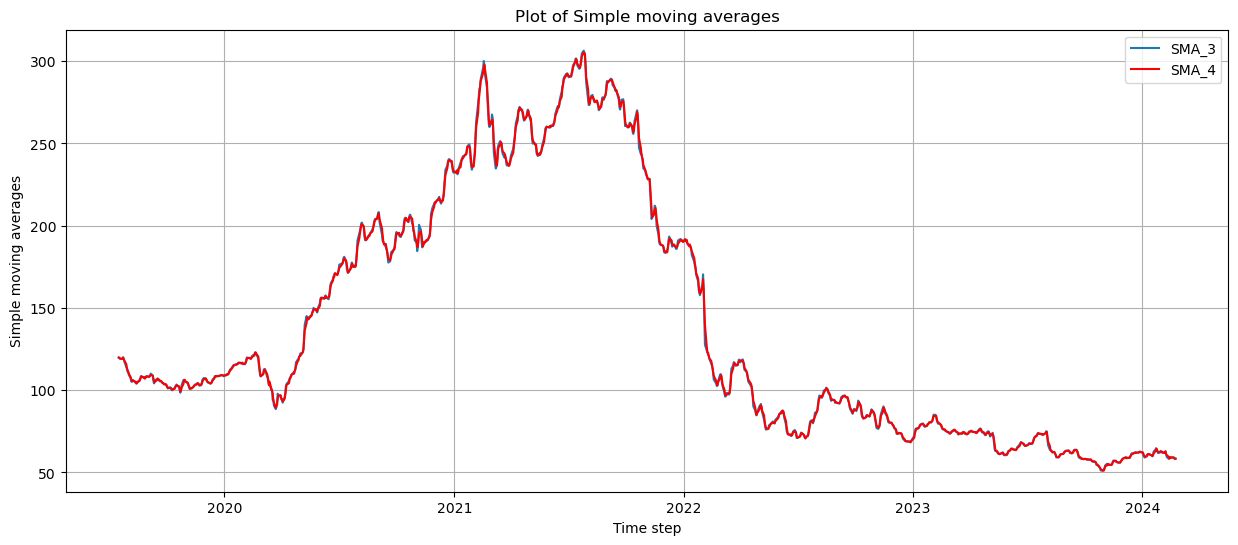

In [35]:
# Plot the test predictions and true values
plt.figure(figsize=(15,6))
plt.plot(new_data['SMA_3'], label='SMA_3')
plt.plot(new_data['SMA_4'], color='r', label='SMA_4')
plt.title('Plot of Simple moving averages')
plt.ylabel('Simple moving averages')
plt.xlabel('Time step')
plt.legend()
plt.grid()
plt.savefig('forcast.png')
plt.show()

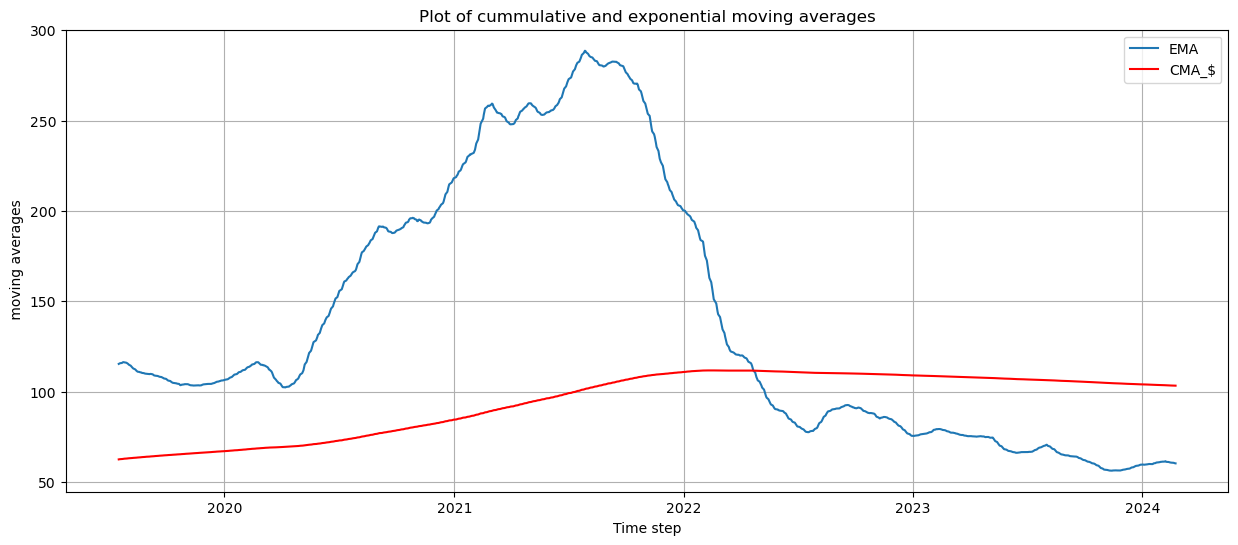

In [36]:
# Plot the test predictions and true values
plt.figure(figsize=(15,6))
plt.plot(new_data['EMA'], label='EMA')
plt.plot(new_data['CMA_4'], color='r', label='CMA_$')
plt.title('Plot of cummulative and exponential moving averages')
plt.ylabel(' moving averages')
plt.xlabel('Time step')
plt.legend()
plt.grid()
plt.savefig('forcast.png')
plt.show()

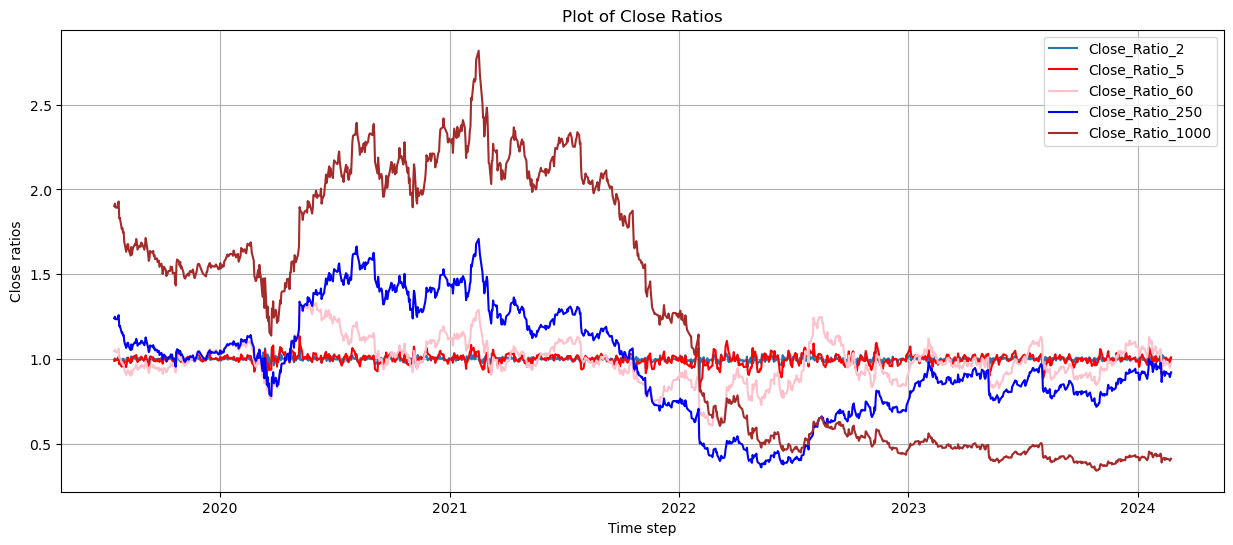

In [37]:
# Plot the test predictions and true values
plt.figure(figsize=(15,6))
plt.plot(new_data['Close_Ratio_2'], label='Close_Ratio_2')
plt.plot(new_data['Close_Ratio_5'], color='r', label='Close_Ratio_5')
plt.plot(new_data['Close_Ratio_60'], color='pink', label='Close_Ratio_60')
plt.plot(new_data['Close_Ratio_250'], color='b', label='Close_Ratio_250')
plt.plot(new_data['Close_Ratio_1000'], color='brown', label='Close_Ratio_1000')
#plt.plot(new_data['close'], color='g', label='Close_Ratio_2')
plt.title('Plot of Close Ratios')
plt.ylabel('Close ratios')
plt.xlabel('Time step')
plt.legend()
plt.grid()
plt.savefig('forcast.png')
plt.show()

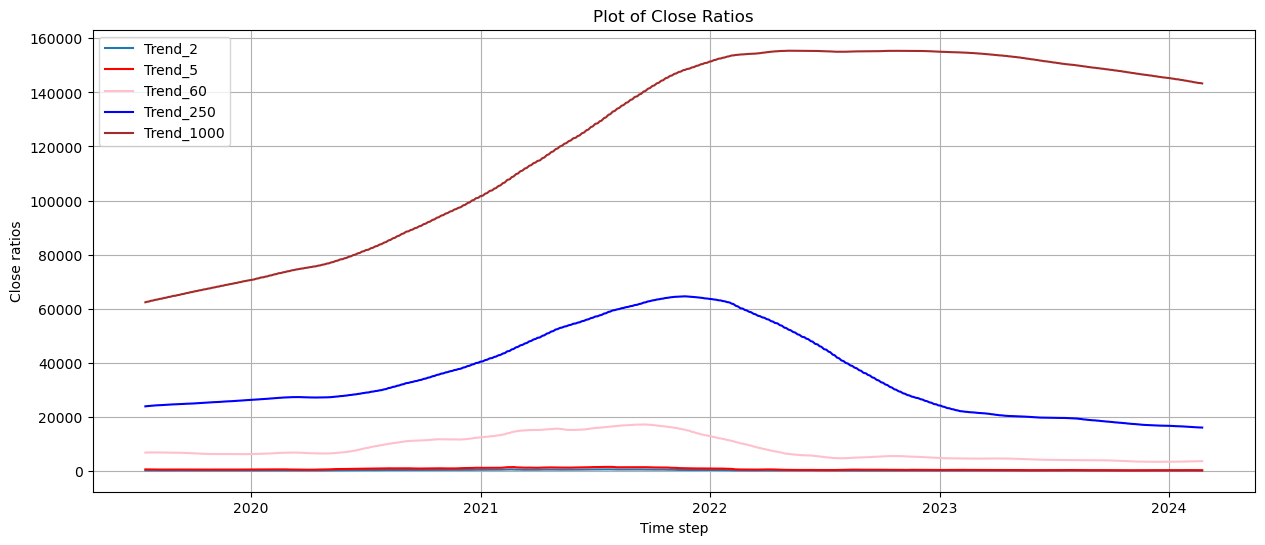

In [38]:
# Plot the test predictions and true values
plt.figure(figsize=(15,6))
plt.plot(new_data['Trend_2'], label='Trend_2')
plt.plot(new_data['Trend_5'], color='r', label='Trend_5')
plt.plot(new_data['Trend_60'], color='pink', label='Trend_60')
plt.plot(new_data['Trend_250'], color='b', label='Trend_250')
plt.plot(new_data['Trend_1000'], color='brown', label='Trend_1000')
#plt.plot(new_data['close'], color='g', label='Close_Ratio_2')
plt.title('Plot of Close Ratios')
plt.ylabel('Close ratios')
plt.xlabel('Time step')
plt.legend()
plt.grid()
plt.savefig('forcast.png')
plt.show()

In [39]:
new_data['RSI']=data['RSI']
new_data['previousday']=data['previousday']

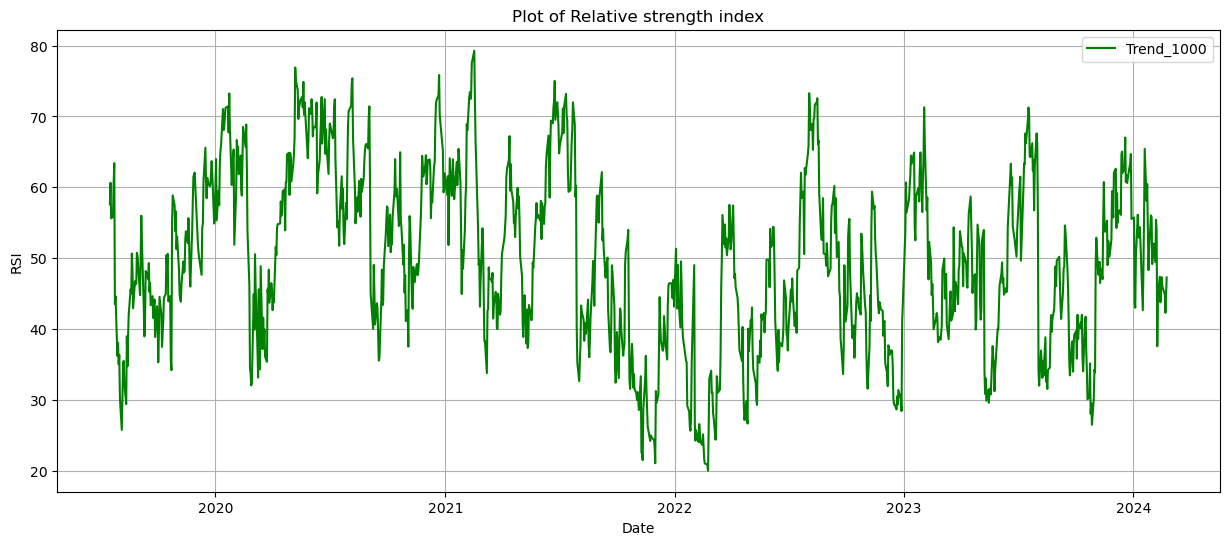

In [40]:
# Plot the test predictions and true values
plt.figure(figsize=(15,6))
plt.plot(new_data['RSI'], color='g', label='Trend_1000')
#plt.plot(new_data['close'], color='g', label='Close_Ratio_2')
plt.title('Plot of Relative strength index')
plt.ylabel('RSI')
plt.xlabel('Date')
plt.legend()
plt.grid()
plt.savefig('forcast.png')
plt.show()

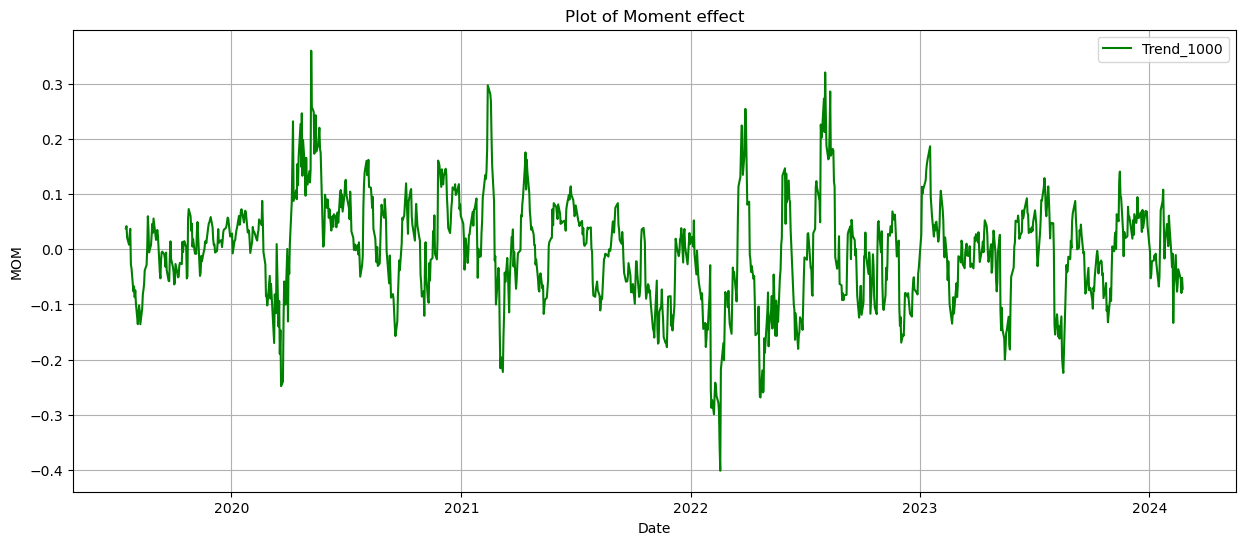

In [41]:
# Plot the test predictions and true values
plt.figure(figsize=(15,6))
plt.plot(new_data['MOM'], color='g', label='Trend_1000')
#plt.plot(new_data['close'], color='g', label='Close_Ratio_2')
plt.title('Plot of Moment effect')
plt.ylabel('MOM')
plt.xlabel('Date')
plt.legend()
plt.grid()
plt.savefig('forcast.png')
plt.show()

In [42]:
train = new_data.iloc[:-200]
test = new_data.iloc[-200:]

In [43]:
train.shape

(960, 18)

In [44]:
new_data.columns

Index(['Close_Ratio_2', 'Trend_2', 'Close_Ratio_5', 'Trend_5',
       'Close_Ratio_60', 'Trend_60', 'Close_Ratio_250', 'Trend_250',
       'Close_Ratio_1000', 'Trend_1000', 'close', 'MOM', 'SMA_3', 'SMA_4',
       'CMA_4', 'EMA', 'RSI', 'previousday'],
      dtype='object')

In [45]:
predictors= ['SMA_3','SMA_4','EMA','RSI','MOM','previousday' ] 

#### Retrain the models on the new predictors

In [46]:
# creating a dictionary of Regressors to be experimented on.
models_dict = {
          'RF Regressor':RandomForestRegressor(random_state=0),
          'xgboost': XGBRegressor(),'Gradient Boost': GradientBoostingRegressor(random_state=0),
    'Catboostregressor':CatBoostRegressor(iterations=100, early_stopping_rounds=50)
         }

#looping through all the regressors, fitting and evaluating them on Cross validation and test data respectively
for key, model in models_dict.items():
    model.fit(train[predictors], train['close'])
    print(f'Performance of "{key}" on  Test set:')
    print('=='*28)
    print ( 'Test set:')
    print("**"*8)
    evaluate_model(model,test[predictors], test['close'])

Performance of "RF Regressor" on  Test set:
Test set:
****************
MAE: 9.46
MAPE: 0.16
minae: 0.05
maxae: 17.59
medae: 9.43

Performance of "xgboost" on  Test set:
Test set:
****************
MAE: 9.73
MAPE: 0.16
minae: 0.10
maxae: 17.82
medae: 9.71

Performance of "Gradient Boost" on  Test set:
Test set:
****************
MAE: 10.40
MAPE: 0.18
minae: 0.20
maxae: 18.69
medae: 10.34

Learning rate set to 0.264471
0:	learn: 54.8388189	total: 3.36ms	remaining: 333ms
1:	learn: 41.7999852	total: 6.5ms	remaining: 318ms
2:	learn: 31.7608146	total: 9.7ms	remaining: 314ms
3:	learn: 24.3168844	total: 12.3ms	remaining: 295ms
4:	learn: 18.7429677	total: 15.3ms	remaining: 290ms
5:	learn: 14.5774505	total: 18ms	remaining: 283ms
6:	learn: 11.6549806	total: 20.9ms	remaining: 278ms
7:	learn: 9.4571126	total: 23.6ms	remaining: 272ms
8:	learn: 7.8530049	total: 26.9ms	remaining: 272ms
9:	learn: 6.7484618	total: 31.1ms	remaining: 280ms
10:	learn: 6.0266648	total: 33.9ms	remaining: 275ms
11:	learn: 5.498

#### Improving the model

In [47]:
#model_1 = RandomForestClassifier(n_estimators=200, min_samples_split=50, random_state=1)
#n_estimators=200, min_samples_split=50, random_state=1
model_2= GradientBoostingRegressor(random_state=0)

def predict(train, test, predictors_1, model_1):
    model_1.fit(train[predictors_1], train["Target"])
    preds_1 = model_1.predict_proba(test[predictors_1])[:,1]
    preds_1[preds_1 >=.6] = 1
    preds_1[preds_1 <.6] = 0
    preds_1 = pd.Series(preds_1, index=test.index, name="Predictions_1")
    combined_1 = pd.concat([test["Target"], preds_1], axis=1)
    return combined_1 

In [48]:
def predict(train, test, predictors, model_2):
    model_2.fit(train[predictors], train["close"])
    preds_2 = model_2.predict(test[predictors])
    preds_2 = pd.Series(preds_2, index=test.index, name="Predictions_2")
    combined_2 = pd.concat([test["close"], preds_2], axis=1)
    return combined_2

In [51]:
def backtest(new_data, model_2, predictors, start=500, step=250):
    all_predictions = []

    for i in range(start, new_data.shape[0], step):
        train = new_data.iloc[0:i].copy()
        test = new_data.iloc[i:(i+step)].copy()
        predictions_2 = predict(train, test, predictors, model_2)
        all_predictions.append(predictions_2)
    
    return pd.concat(all_predictions)

In [52]:
predictions_2 = backtest(new_data, model_2, predictors)

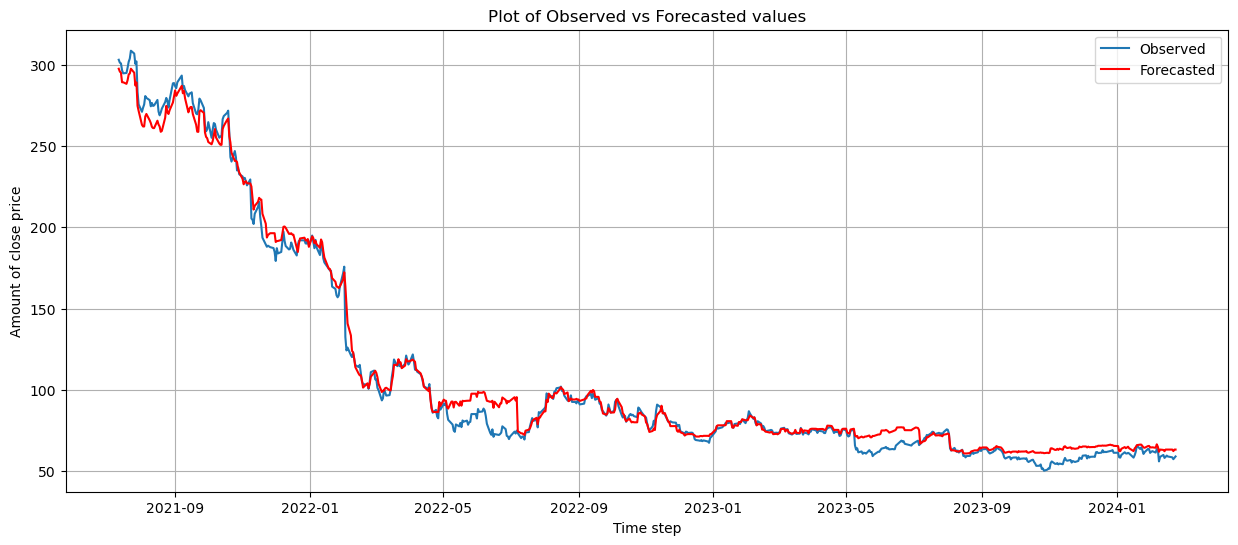

In [53]:
# Plot the test predictions and true values
plt.figure(figsize=(15,6))
plt.plot(predictions_2['close'], label='Observed')
plt.plot(predictions_2['Predictions_2'], color='r', label='Forecasted')
plt.title('Plot of Observed vs Forecasted values')
plt.ylabel('Amount of close price')
plt.xlabel('Time step')
plt.legend()
plt.grid()
plt.savefig('forcast.png')
plt.show()

In [54]:
model_2.fit(train[predictors], train['close'])
prediction=model_2.predict(test[predictors])

In [55]:
mape= mean_absolute_percentage_error(test['close'], prediction)
mae=mean_absolute_error(test['close'], prediction)

In [56]:
print('mean absolute percentage error is : {}\n'.format(mape))
print('mean absolute  error is : {}\n'.format(mae))

mean absolute percentage error is : 0.17509229700655557

mean absolute  error is : 10.399996624122604



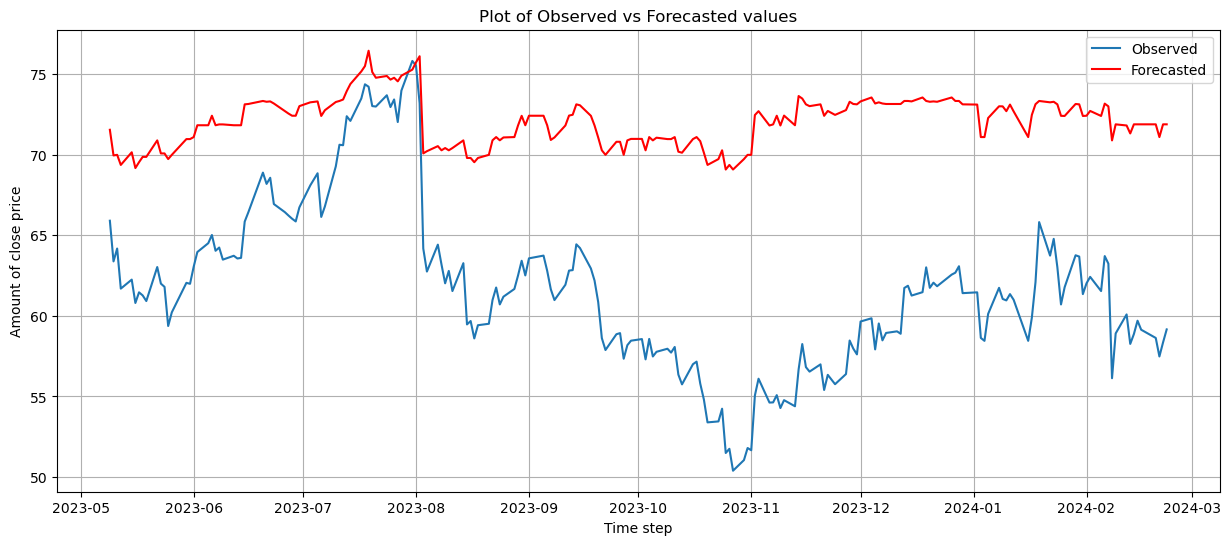

In [57]:
# Plot the test predictions and true values
pred= pd.Series(prediction, index=test.index)
plt.figure(figsize=(15,6))
plt.plot(test['close'], label='Observed')
plt.plot(pred, color='r', label='Forecasted')
plt.title('Plot of Observed vs Forecasted values')
plt.ylabel('Amount of close price')
plt.xlabel('Time step')
plt.legend()
plt.grid()
plt.savefig('forcast.png')
plt.show()

#### Perform Hyper parameter tuning using grid searchcv

#possibe hyperparameters for random forest
hyper = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 6]
}

from sklearn.model_selection import GridSearchCV

cv_model= GridSearchCV(GradientBoostingRegressor(), param_grid=hyper)
cv_model.fit(train[predictors], train['close'])

print(cv_model.best_score_)
print(cv_model.best_estimator_)

In [58]:
model = GradientBoostingRegressor(max_depth=7, n_estimators=350,  min_samples_split=5)
model.fit(train[predictors], train['close'])
prediction=model.predict(test[predictors])

In [59]:
grdb_mae =  mean_absolute_error(test['close'], prediction)
abs_errors= np.abs(np.array(prediction) - np.array(test['close']))
grdb_min_abs_errors= np.min(abs_errors)
grdb_max_abs_errors= np.max(abs_errors)
grdb_med_abs_errors= np.median(abs_errors)
grdb_mape = mean_absolute_percentage_error(test['close'], prediction)

In [60]:
print(f"Optimized Gradient boosting Performance Metrics \n\n \
gradientboost Mae: {grdb_mae} \n \
gradientboost minae: {grdb_min_abs_errors} \n \
gradientboost maxae: {grdb_max_abs_errors} \n \
gradientboost medae: {grdb_med_abs_errors} \n \
gradientboost Mape: {grdb_mape} \n \
 \n\n <-------------------------------------------------->\n")

Optimized Gradient boosting Performance Metrics 

 gradientboost Mae: 10.240137720800266 
 gradientboost minae: 0.39121520771135465 
 gradientboost maxae: 18.37828693752575 
 gradientboost medae: 10.27695667588819 
 gradientboost Mape: 0.17198112351006642 
  

 <-------------------------------------------------->



In [61]:
pred= pd.Series(prediction, index=test.index)
combined= pd.concat([test['close'], pred],axis=1)
combined 

,close,0
date,,
2023-05-09,65.904999,70.448698
2023-05-10,63.380001,68.329624
2023-05-11,64.180000,68.345144
2023-05-12,61.689999,67.758552
2023-05-15,62.250000,67.952755
...,...,...
2024-02-16,59.139999,72.246154
2024-02-20,58.630001,71.409460
2024-02-21,57.480000,70.851485


In [62]:
mape= mean_absolute_percentage_error(test['close'], prediction)
mae=mean_absolute_error(test['close'], prediction)

In [63]:
print('mean absolute percentage error is : {}\n'.format(mape))
print('mean absolute  error is : {}\n'.format(mae))

mean absolute percentage error is : 0.17198112351006642

mean absolute  error is : 10.240137720800266



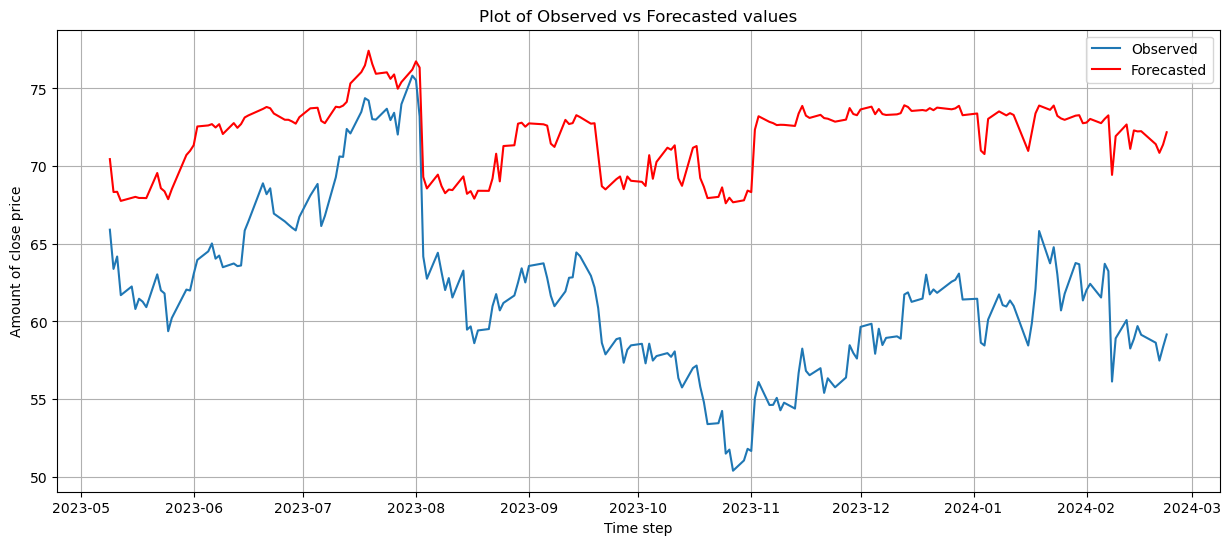

In [64]:
# Plot the test predictions and true values
plt.figure(figsize=(15,6))
plt.plot(combined['close'], label='Observed')
plt.plot(combined[0], color='r', label='Forecasted')
plt.title('Plot of Observed vs Forecasted values')
plt.ylabel('Amount of close price')
plt.xlabel('Time step')
plt.legend()
plt.grid()
plt.savefig('forcast.png')
plt.show()

### Stacking and Bagging

In [65]:
# List of machine learning algorithms to consider
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso,ElasticNet 
algorithms = [
    ('Linear regression', LinearRegression(), {}),
    ('Ridge', Ridge(), {}),
    ('Lasso', Lasso(), {}),
    ('Elastic Net', ElasticNet(), {}),
    #('SVM', SVC(kernel='linear', probability=True, decision_function_shape='ovr'), {}),
    ('MLP', MLPRegressor(), {})
]

# Train base models
base_models = {}
for algorithm_name, algorithm, _ in algorithms:
    print(algorithm)
    model = algorithm
    model.fit(train[predictors], train['close'])
    base_models[algorithm_name] = model

eval_metrics = ['mae', 'mape']
results = pd.DataFrame(columns=['Algorithm'] + eval_metrics)

for algorithm_name, model in base_models.items():
    y_pred = model.predict(test[predictors])
    mae= mean_absolute_error(test['close'], y_pred)
    mape =mean_absolute_percentage_error(test['close'], y_pred)

# Ensembling using Bagging with all base models
bagging_model = BaggingRegressor(base_estimator=None, n_estimators=10, random_state=42)
bagging_model.fit(train[predictors], train['close'])
bagging_y_pred = bagging_model.predict(test[predictors])
bagging_mae = mean_absolute_error(test['close'], bagging_y_pred)
abs_errors= np.abs(np.array(bagging_y_pred) - np.array(test['close']))
bagg_min_abs_errors= np.min(abs_errors)
bagg_max_abs_errors= np.max(abs_errors)
bagg_med_abs_errors= np.median(abs_errors)
bagging_mape = mean_absolute_percentage_error(test['close'], bagging_y_pred)
print(f"Bagging Ensemble Method Performance Metrics \n\n \
bagging Mae: {bagging_mae} \n \
bagging minae: {bagg_min_abs_errors} \n \
bagging maxae: {bagg_max_abs_errors} \n \
bagging medae: {bagg_med_abs_errors} \n \
bagging Mape: {bagging_mape} \n \
 \n\n <-------------------------------------------------->\n")

# Ensembling using Stacking
meta_model = Ridge()
stacking_model = StackingRegressor(estimators=list(base_models.items()), final_estimator=meta_model)
stacking_model.fit(train[predictors], train['close'])
stacking_y_pred = stacking_model.predict(test[predictors])
stacking_mae =  mean_absolute_error(test['close'], stacking_y_pred)
abs_errors= np.abs(np.array(stacking_y_pred) - np.array(test['close']))
stack_min_abs_errors= np.min(abs_errors)
stack_max_abs_errors= np.max(abs_errors)
stack_med_abs_errors= np.median(abs_errors)
stacking_mape = mean_absolute_percentage_error(test['close'], stacking_y_pred)
print(f"Stacking Ensemble Method Performance Metrics \n\n \
stacking mae: {stacking_mae} \n \
stacking minae: {stack_min_abs_errors} \n \
stacking maxae: {stack_max_abs_errors} \n \
stacking medae: {stack_med_abs_errors} \n \
stacking mape: {stacking_mape} \n")




#print(f"Stacking F1 Score: {stacking_f1}")


LinearRegression()
Ridge()
Lasso()
ElasticNet()
MLPRegressor()
Bagging Ensemble Method Performance Metrics 

 bagging Mae: 10.051070969999994 
 bagging minae: 0.39400060000001247 
 bagging maxae: 18.406001999999994 
 bagging medae: 10.036000799999993 
 bagging Mape: 0.168998638220074 
  

 <-------------------------------------------------->

Stacking Ensemble Method Performance Metrics 

 stacking mae: 1.0465852219256915 
 stacking minae: 0.00040488975220398515 
 stacking maxae: 4.431441150739097 
 stacking medae: 0.9077527215048278 
 stacking mape: 0.01719991990019293 



In [66]:
bagging_y_pred= pd.Series(bagging_y_pred, index=test.index)
stacking_y_pred= pd.Series(stacking_y_pred, index=test.index)

In [67]:
combined_stack= pd.concat([test['close'], stacking_y_pred],axis=1)
combined_bagg= pd.concat([test['close'], bagging_y_pred], axis=1)

In [68]:
combined_bagg.head()

,close,0
date,,
2023-05-09,65.904999,72.023000
2023-05-10,63.380001,68.573000
2023-05-11,64.180000,68.564002
2023-05-12,61.689999,68.109002
2023-05-15,62.250000,68.197002


In [69]:
combined_stack.head()

,close,0
date,,
2023-05-09,65.904999,68.248961
2023-05-10,63.380001,65.080548
2023-05-11,64.180000,59.992639
2023-05-12,61.689999,59.572830
2023-05-15,62.250000,61.115292


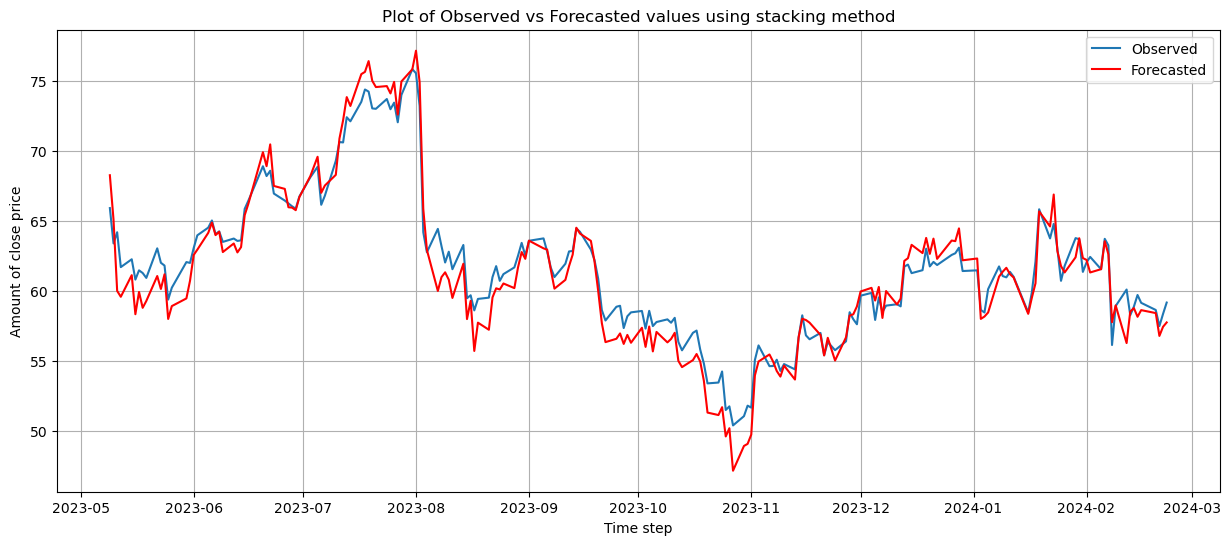

In [70]:
# Plot the test predictions and true values
plt.figure(figsize=(15,6))
plt.plot(combined_stack['close'], label='Observed')
plt.plot(combined_stack[0], color='r', label='Forecasted')
plt.title('Plot of Observed vs Forecasted values using stacking method')
plt.ylabel('Amount of close price')
plt.xlabel('Time step')
plt.legend()
plt.grid()
plt.savefig('forcast.png')
plt.show()

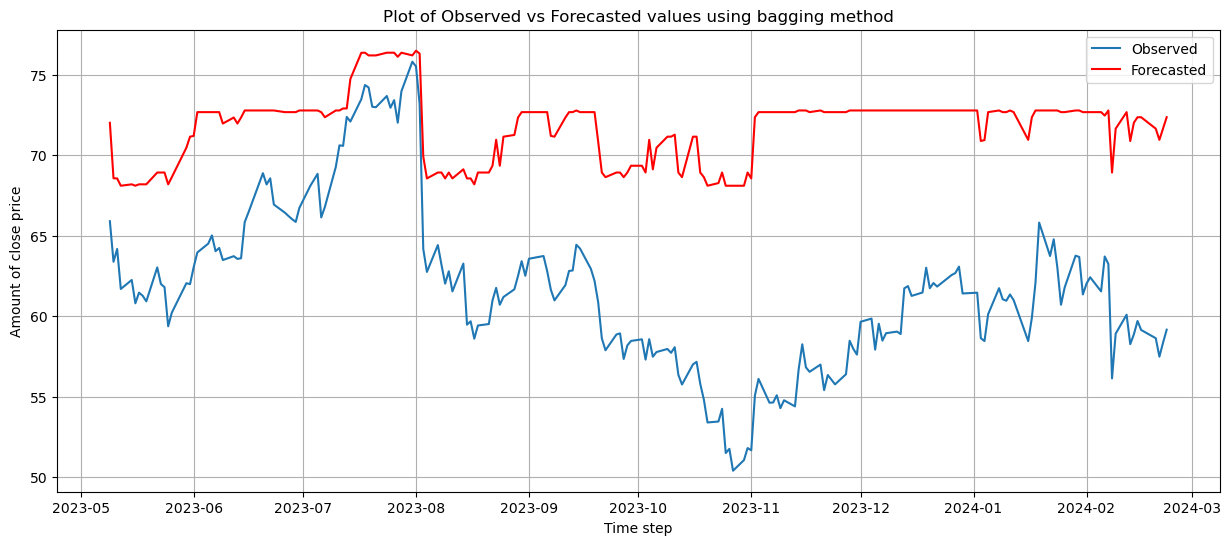

In [71]:
# Plot the test predictions and true values
plt.figure(figsize=(15,6))
plt.plot(combined_bagg['close'], label='Observed')
plt.plot(combined_bagg[0], color='r', label='Forecasted')
plt.title('Plot of Observed vs Forecasted values using bagging method')
plt.ylabel('Amount of close price')
plt.xlabel('Time step')
plt.legend()
plt.grid()
plt.savefig('forcast.png')
plt.show()

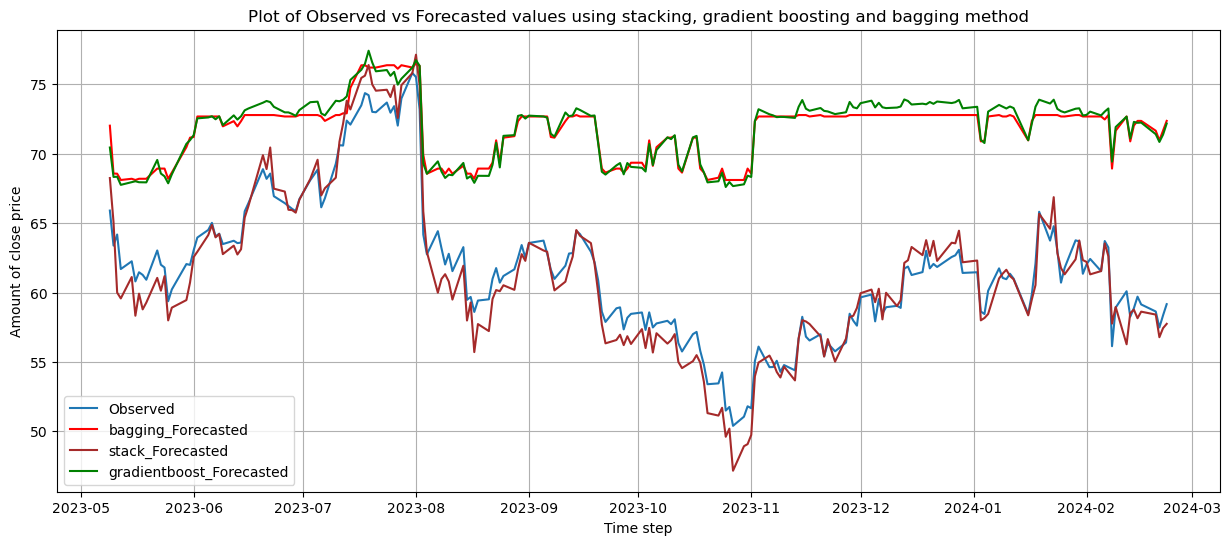

In [72]:
# Plot the test predictions and true values
plt.figure(figsize=(15,6))
plt.plot(combined_bagg['close'], label='Observed')
plt.plot(combined_bagg[0], color='r', label='bagging_Forecasted')
plt.plot(combined_stack[0], color='brown', label='stack_Forecasted')
plt.plot(combined[0], color='green', label='gradientboost_Forecasted')
plt.title('Plot of Observed vs Forecasted values using stacking, gradient boosting and bagging method')
plt.ylabel('Amount of close price')
plt.xlabel('Time step')
plt.legend()
plt.grid()
plt.savefig('paypalresult.png')
plt.show()

In [73]:
from prettytable import PrettyTable
import joblib
import os
# Constructing the result summary table containing the scores for each model on  test dataset.

task1_result = PrettyTable()
task1_result.field_names = ["Regressor", "MAE on Test","MAPE on Test", "MinAE on Test", "MaxAE on Test", "MedAE on Test"]
task1_result.add_row(['RF Reg', 9.46, 0.16, 0.05, 17.59, 9.43])
task1_result.add_row(['XGboost', 9.73, 0.16, 0.10, 17.82, 9.71])
task1_result.add_row(['GradientBoost', 10.40, 0.18, 0.20, 18.69, 10.34])
task1_result.add_row(['Catboost', 12.93, 0.21, 0.47, 36.06, 12.25])
task1_result.add_row(['Bagging', 10.05, 0.17, 0.39, 18.41, 10.04])
task1_result.add_row(['Stacking', 0.10, 0.02, 0.00, 4.32, 0.81])

print('Result Summary for All Regressors :')
print(task1_result)

Result Summary for All Regressors :
+---------------+-------------+--------------+---------------+---------------+---------------+
|   Regressor   | MAE on Test | MAPE on Test | MinAE on Test | MaxAE on Test | MedAE on Test |
+---------------+-------------+--------------+---------------+---------------+---------------+
|     RF Reg    |     9.46    |     0.16     |      0.05     |     17.59     |      9.43     |
|    XGboost    |     9.73    |     0.16     |      0.1      |     17.82     |      9.71     |
| GradientBoost |     10.4    |     0.18     |      0.2      |     18.69     |     10.34     |
|    Catboost   |    12.93    |     0.21     |      0.47     |     36.06     |     12.25     |
|    Bagging    |    10.05    |     0.17     |      0.39     |     18.41     |     10.04     |
|    Stacking   |     0.1     |     0.02     |      0.0      |      4.32     |      0.81     |
+---------------+-------------+--------------+---------------+---------------+---------------+
